# 8_Rna_Training_Model.ipynb

## Visão Geral

Este notebook tem como objetivo treinar um modelo de Rede Neural Artificial (RNA) para prever diferenças de latitude e longitude com base em dados de satélites. O processo envolve várias etapas, desde o carregamento e preparação dos dados até a construção, treinamento e avaliação do modelo. A seguir, uma descrição detalhada das principais seções e funcionalidades implementadas no notebook.

## Estrutura do Notebook

### Bloco 1: Imports e Configurações

- **Importação de Bibliotecas**: Carrega todas as bibliotecas necessárias, incluindo `numpy`, `pandas`, `matplotlib`, `tensorflow`, `sklearn`, entre outras.
- **Configurações Iniciais**: Define caminhos para os arquivos JSON de entrada e saída, parâmetros de treinamento como tamanho do lote (`BATCH_SIZE`), número de épocas (`EPOCHS`), proporção de validação (`VAL_SPLIT`), e outros parâmetros relevantes.

### Bloco 2: Funções Utilitárias

- **Descoberta de Chaves das Features**: Função para identificar todas as chaves (features) presentes no arquivo JSON, excluindo as colunas alvo (`TARGET_COLS`).
- **Conversão de Dicionário para Arrays NumPy**: Transforma cada registro do JSON em arrays NumPy (`X` para features e `y` para targets), garantindo que todas as features sejam representadas de forma consistente.
- **Gerador de Dataset com ijson**: Utiliza a biblioteca `ijson` para processar o arquivo JSON de forma eficiente e gerar pares `(X, y)` para o treinamento.
- **Criação do Dataset do TensorFlow**: Constrói um `tf.data.Dataset` para streaming dos dados, com funcionalidades de embaralhamento, agrupamento em lotes e prefetching para otimização do treinamento.

### Bloco 3: Construção do Modelo com Blocos Residenciais

- **Definição de Blocos Residenciais**: Implementa blocos residuais que ajudam a mitigar o problema de gradientes desaparecidos, permitindo a construção de modelos mais profundos.
- **Função de Construção do Modelo (`build_model`)**: Monta a arquitetura completa da RNA, incluindo camadas densas iniciais, múltiplos blocos residuais, camadas intermediárias e a camada de saída com ativação linear para prever as diferenças de latitude e longitude.

### Bloco 4: Função Principal - Treino, Fine-tuning, Gráficos e Predições

- **Descoberta e Preparação das Features**: Identifica as chaves das features no dataset e prepara o dataset para treinamento.
- **Carregamento e Streaming dos Dados**: Utiliza o `tf.data.Dataset` para carregar os dados em streaming, permitindo o processamento eficiente de grandes volumes de dados.
- **Pré-Treinamento em um Subconjunto dos Dados**: Realiza um pré-treinamento do modelo em um subconjunto dos dados para inicializar os pesos de forma eficaz.
- **Fine-Tuning com o Dataset Completo**: Ajusta o modelo treinado previamente utilizando o dataset completo em streaming, refinando os pesos para melhorar a performance.
- **Normalização dos Dados**: Aplica técnicas de normalização tanto nos dados de treinamento quanto no streaming, garantindo que as features estejam em uma escala adequada para o treinamento da RNA.
- **Treinamento do Modelo**: Executa o processo de treinamento com callbacks para early stopping e checkpointing, salvando o melhor modelo baseado na perda de validação.
- **Salvamento do Modelo Final**: Armazena o modelo treinado para uso futuro.

### Bloco 5: Gráficos do Treinamento

- **Visualização da Evolução da Perda (Loss)**: Plota gráficos comparativos das perdas de treinamento e validação durante as fases de pré-treinamento e fine-tuning, permitindo a análise do comportamento do modelo ao longo das épocas.

### Bloco 6: Exemplos de Predições

- **Comparação entre Predições e Valores Reais**: Realiza predições no conjunto de validação e exibe exemplos comparando os valores previstos com os valores reais, fornecendo uma avaliação qualitativa do desempenho do modelo.

### Bloco 7: Execução do Notebook

- **Execução da Função Principal**: Garante que a função `main()` seja executada quando o notebook for executado diretamente, iniciando todo o fluxo de treinamento e avaliação do modelo.

## Considerações Finais

Este notebook implementa um fluxo completo para treinar e avaliar um modelo de RNA utilizando dados de satélites. As principais etapas incluem:

1. **Preparação dos Dados**: Carregamento eficiente, descoberta de features e normalização.
2. **Construção do Modelo**: Definição de uma arquitetura robusta com blocos residuais.
3. **Treinamento e Fine-Tuning**: Treinamento inicial em um subconjunto seguido de ajuste fino com o dataset completo.
4. **Avaliação e Visualização**: Análise da evolução do treinamento e comparação das predições com os valores reais.

Certifique-se de que todos os caminhos de arquivos estejam corretos e que as dependências estejam instaladas antes de executar o notebook. Este fluxo facilita a criação de modelos precisos para previsão de diferenças de latitude e longitude com base em dados de satélites.


2025-01-16 01:26:37.292111: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-16 01:26:37.315176: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[INFO] GPUs detectadas: ['/physical_device:GPU:0']
[INFO] Usando GPU: /physical_device:GPU:0


2025-01-16 01:26:38.427317: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-01-16 01:26:38.431260: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-01-16 01:26:38.431500: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Total de features: 645
[INFO] Lendo dataset inteiro na RAM...
[INFO] Formato X_np: (419878, 645)
[INFO] Formato y_np: (419878, 2)
[INFO] Normalizando dados...
[INFO] Construindo modelo...


2025-01-16 01:30:16.485194: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-01-16 01:30:16.487107: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-01-16 01:30:16.491277: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-01-16 01:30:16.584085: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-01-16 01:30:16.584297: I tensorflow/compile

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 645)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 2048)                 1323008   ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 2048)                 8192      ['dense[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 dropout (Dropout)           (None, 2048)                 0         ['batch_normalization[0][0

2025-01-16 01:30:20.420778: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-01-16 01:30:20.582183: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f07e85de910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-16 01:30:20.582210: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2025-01-16 01:30:20.585301: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-16 01:30:20.592801: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2025-01-16 01:30:20.671812: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

40/40 [==============================] - ETA: 0s - loss: 35.8889 - mae: 2.5322 - mse: 35.8172  

/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 23s 415ms/step - loss: 35.8889 - mae: 2.5322 - mse: 35.8172 - val_loss: 42.9877 - val_mae: 3.3559 - val_mse: 42.9160
Epoch 2/1000
40/40 [==============================] - 16s 401ms/step - loss: 31.5708 - mae: 2.4043 - mse: 31.4991 - val_loss: 40.1322 - val_mae: 3.2786 - val_mse: 40.0604
Epoch 3/1000
40/40 [==============================] - 17s 415ms/step - loss: 26.5300 - mae: 2.2506 - mse: 26.4582 - val_loss: 25.6782 - val_mae: 2.0783 - val_mse: 25.6065
Epoch 4/1000
40/40 [==============================] - 18s 458ms/step - loss: 22.2503 - mae: 2.0731 - mse: 22.1785 - val_loss: 23.2814 - val_mae: 1.9245 - val_mse: 23.2097
Epoch 5/1000
40/40 [==============================] - 17s 431ms/step - loss: 18.8617 - mae: 1.9197 - mse: 18.7900 - val_loss: 17.3429 - val_mae: 1.7890 - val_mse: 17.2711
Epoch 6/1000
40/40 [==============================] - 18s 439ms/step - loss: 16.4682 - mae: 1.7699 - mse: 16.3965 - val_loss: 16.2002 - val_mae: 1.5568 - val_

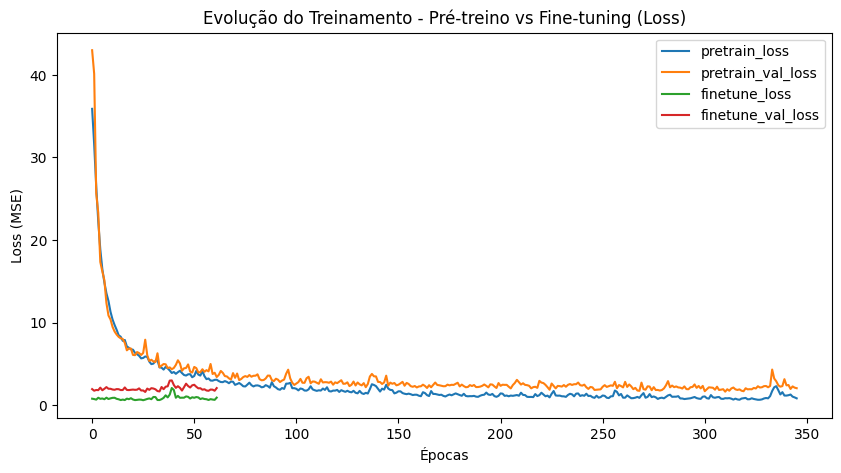


=== Exemplo de Previsões no conjunto de Validação ===
1/1 [==============================] - 0s 178ms/step
Amostra 0: [Real lat=1.820, lon=2.060] --> [Pred lat=1.699, lon=2.342]
Amostra 1: [Real lat=1.620, lon=1.600] --> [Pred lat=1.482, lon=1.722]
Amostra 2: [Real lat=4.700, lon=-0.840] --> [Pred lat=4.797, lon=-0.874]
Amostra 3: [Real lat=-1.910, lon=0.490] --> [Pred lat=-2.184, lon=0.619]
Amostra 4: [Real lat=4.170, lon=1.610] --> [Pred lat=4.114, lon=1.730]
Amostra 5: [Real lat=0.320, lon=-1.180] --> [Pred lat=0.323, lon=-1.069]
Amostra 6: [Real lat=2.010, lon=1.500] --> [Pred lat=2.123, lon=1.698]
Amostra 7: [Real lat=8.040, lon=-0.840] --> [Pred lat=8.220, lon=-0.607]
Amostra 8: [Real lat=5.530, lon=-1.650] --> [Pred lat=5.698, lon=-1.677]
Amostra 9: [Real lat=6.000, lon=-2.510] --> [Pred lat=6.105, lon=-2.555]
Amostra 10: [Real lat=6.000, lon=-2.510] --> [Pred lat=6.133, lon=-2.506]
Amostra 11: [Real lat=2.190, lon=-0.170] --> [Pred lat=2.313, lon=-0.065]
Amostra 12: [Real lat=

In [1]:
###############################################################################
# Bloco 1: Imports e Configurações
###############################################################################
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = DEBUG, 1 = INFO, 2 = WARNING, 3 = ERROR

import ijson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks, optimizers, regularizers
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, BatchNormalization, Add
from tensorflow.keras.models import Model


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Verificar se a GPU está disponível e configurada
if not tf.config.list_physical_devices('GPU'):
    print("[ERRO] Nenhuma GPU detectada. Certifique-se de que o CUDA está instalado e configurado corretamente.")
else:
    print(f"[INFO] GPUs detectadas: {[gpu.name for gpu in tf.config.list_physical_devices('GPU')]}")

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

JSON_PATH = "Dataset_Vetor.json"
TARGET_COLS = ["diferencalatitudeMetros", "diferencalongitudeMetros"]
BATCH_SIZE = 8192
EPOCHS = 1000
VAL_SPLIT = 0.22
MAX_SAMPLES = None  # ou defina para debug (ex: 1_000_000), se quiser testar

###############################################################################
# Bloco 2: Funções para descobrir chaves e carregar dataset por completo
###############################################################################
def discover_feature_keys(json_path, max_samples=None):
    """Descobre todas as chaves (features) disponíveis no JSON."""
    feature_keys_set = set()
    with open(json_path, "rb") as f:
        parser = ijson.items(f, "item")
        count = 0
        for record in parser:
            # Adiciona todas as chaves que não são TARGET_COLS
            for k in record.keys():
                if k not in TARGET_COLS:
                    feature_keys_set.add(k)
            count += 1
            if max_samples and count >= max_samples:
                break
    return sorted(feature_keys_set)

def dict_to_numpy_fixed(record, feature_keys):
    """Converte um dicionário de um item do JSON em (X, y) NumPy."""
    for col in TARGET_COLS:
        if col not in record:
            return None, None
    try:
        lat = float(record["diferencalatitudeMetros"])
        lon = float(record["diferencalongitudeMetros"])
    except:
        return None, None

    y_array = np.array([lat, lon], dtype=np.float32)
    X_array = np.zeros(len(feature_keys), dtype=np.float32)
    for i, k in enumerate(feature_keys):
        val = record.get(k, 0.0)
        try:
            X_array[i] = float(val)
        except:
            X_array[i] = 0.0
    return X_array, y_array

def read_full_dataset(json_path, feature_keys, max_samples=None):
    """
    Lê TODO o JSON em memória, retornando X_np (amostras x n_features) e y_np.
    """
    dataX = []
    dataY = []
    count = 0
    with open(json_path, "rb") as f:
        parser = ijson.items(f, "item")
        for record in parser:
            X, y = dict_to_numpy_fixed(record, feature_keys)
            if X is not None and y is not None:
                dataX.append(X)
                dataY.append(y)
            count += 1
            if max_samples and count >= max_samples:
                break
    X_np = np.array(dataX, dtype=np.float32)
    y_np = np.array(dataY, dtype=np.float32)
    return X_np, y_np

###############################################################################
# Bloco 3: Modelo (com blocos residuais) e função build_model
###############################################################################
def residual_block(x, units, dr=0.2, l2_reg=1e-6):
    """Bloco residual com BN + ReLU + Dropout, ajustado para batch size maior."""
    # Atalho (skip-connection)
    sc = x
    
    # Primeira Dense
    x = Dense(units,
              kernel_initializer='he_normal',
              kernel_regularizer=regularizers.l2(l2_reg),
              bias_regularizer=regularizers.l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dr)(x)
    
    # Segunda Dense
    x = Dense(units,
              kernel_initializer='he_normal',
              kernel_regularizer=regularizers.l2(l2_reg),
              bias_regularizer=regularizers.l2(l2_reg))(x)
    x = BatchNormalization()(x)
    
    # Soma com o skip-connection
    x = Add()([sc, x])
    x = Activation('relu')(x)
    return x

def build_model(input_dim):
    inp = Input(shape=(input_dim,))

    # Camada inicial
    x = Dense(2048,  # Aumente o número de neurônios aqui
              activation='relu',
              kernel_initializer='he_normal',
              kernel_regularizer=regularizers.l2(1e-6),
              bias_regularizer=regularizers.l2(1e-6))(inp)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)  # Ajuste o dropout para evitar overfitting

    
    # Blocos residuais (ajustados)
    for _ in range(8):  # Aumente o número de blocos
        x = residual_block(x, 2048, dr=0.2, l2_reg=1e-6)  # Aumente o número de neurônios e dropout


    # Camada intermediária
    x = Dense(1024,  # Aumente o número de neurônios aqui
              activation='relu',
              kernel_initializer='he_normal',
              kernel_regularizer=regularizers.l2(1e-6),
              bias_regularizer=regularizers.l2(1e-6))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)


    # Saída
    out = Dense(2, activation='linear')(x)

    model = Model(inp, out)
    model.compile(
        optimizer=optimizers.Adam(1e-4),
        loss='mse',
        metrics=['mae', 'mse']
    )
    return model

###############################################################################
# Bloco 4: MAIN - Carregar tudo em RAM, pré-treino, fine-tuning e gráficos
###############################################################################
def main():
    # 1) Descobrir chaves (features)
    feature_keys = discover_feature_keys(JSON_PATH, max_samples=MAX_SAMPLES)
    if not feature_keys:
        print("Nenhuma feature encontrada. Verifique seu JSON.")
        return
    print(f"Total de features: {len(feature_keys)}")

    # 2) Ler TODO o dataset em memória
    print("[INFO] Lendo dataset inteiro na RAM...")
    X_np, y_np = read_full_dataset(JSON_PATH, feature_keys, max_samples=MAX_SAMPLES)
    print("[INFO] Formato X_np:", X_np.shape)
    print("[INFO] Formato y_np:", y_np.shape)

    # 3) Separar dados em train/val
    X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
        X_np, y_np, test_size=VAL_SPLIT, random_state=42
    )

    # 4) Normalizar
    print("[INFO] Normalizando dados...")
    scaler = StandardScaler()
    scaler.fit(X_train_np)
    X_train_np = scaler.transform(X_train_np)
    X_val_np = scaler.transform(X_val_np)

    # 5) Construir o modelo
    print("[INFO] Construindo modelo...")
    model = build_model(input_dim=X_train_np.shape[1])
    model.summary()

    # Callbacks
    es = callbacks.EarlyStopping(monitor='val_loss', patience=35, restore_best_weights=True)
    ckpt = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss')

    # 6) Pré-treino offline no subset
    #    Neste exemplo, vamos dizer que o "subset" são os próprios X_train_np, y_train_np
    #    Mas se você quiser um subset ainda menor, basta amostrar parte do X_train_np.
    print("\n=== Pré-treino offline no subset ===")
    subset_size = min(len(X_train_np), 500000)  # Exemplo: usar 500k amostras no pretreino
    X_sub_np = X_train_np[:subset_size]
    y_sub_np = y_train_np[:subset_size]

    with tf.device('/GPU:0'):  # Forçar uso da GPU
        history_pretrain = model.fit(
            X_sub_np, y_sub_np,
            validation_data=(X_val_np, y_val_np),
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            callbacks=[es, ckpt],
            verbose=1
        )

    # 7) Fine-tuning no dataset completo (ou seja, todo X_train_np) usando GPU
    print("\n=== Fine-tuning no dataset completo ===")
    with tf.device('/GPU:0'):
        history_finetune = model.fit(
            X_train_np, y_train_np,
            validation_data=(X_val_np, y_val_np),
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            callbacks=[es, ckpt],
            verbose=1
        )

    # Salvar o modelo final
    model.save("final_residual_model.h5")
    print("[INFO] Modelo final salvo em 'final_residual_model.h5'")

    ############################################################################
    # Bloco 5: Gráficos do treinamento (Loss vs. Épocas)
    ############################################################################
    plt.figure(figsize=(10, 5))
    plt.title("Evolução do Treinamento - Pré-treino vs Fine-tuning (Loss)")
    plt.plot(history_pretrain.history['loss'], label='pretrain_loss')
    plt.plot(history_pretrain.history['val_loss'], label='pretrain_val_loss')
    plt.plot(history_finetune.history['loss'], label='finetune_loss')
    plt.plot(history_finetune.history['val_loss'], label='finetune_val_loss')
    plt.xlabel("Épocas")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.show()

    ############################################################################
    # Bloco 6: Exemplo de predição vs. real
    ############################################################################
    print("\n=== Exemplo de Previsões no conjunto de Validação ===")
    preds = model.predict(X_val_np[:20])
    for i in range(20):
        real_lat, real_lon = y_val_np[i]
        pred_lat, pred_lon = preds[i]
        print(f"Amostra {i}: [Real lat={real_lat:.3f}, lon={real_lon:.3f}] --> [Pred lat={pred_lat:.3f}, lon={pred_lon:.3f}]")

###############################################################################
# Execução
###############################################################################
if __name__ == "__main__":
    # Garantir que o TensorFlow use a GPU (se disponível)
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            # Configurar TensorFlow para usar apenas uma GPU (opcional)
            tf.config.experimental.set_memory_growth(gpus[0], True)
            tf.config.set_visible_devices(gpus[0], 'GPU')
            print(f"[INFO] Usando GPU: {gpus[0].name}")
        except RuntimeError as e:
            print("[ERRO] Falha ao configurar GPU:", e)

    main()
